Stock Price Predictor

In [1]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23914 sha256=e157fe8ee67ecea69167c18ddc3ce4dacd7c99363004f104190ab31fe2e93b05
  Stored in directory: c:\users\panav\appdata\local\pip\cache\wheels\ec\cc\c1\32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8372 sha256=160ae405df2085a67b58093375d6f863d223edd033f3fe4d7ef485cf6d6a1c4d
  Stored in directory: c:\users\panav\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [10]:
stocks = input("Enter Code of the Stock to get Prediction: ")
data = yf.download(stocks, '2008-01-01', '2021-01-18', auto_adjust = True)
data.head

Enter Code of the Stock to get Prediction: NG=F
[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.head of              Open   High    Low  Close  Volume
Date                                          
2007-12-31  7.349  7.540  7.283  7.483   27299
2008-01-02  7.572  7.876  7.564  7.850   68553
2008-01-03  7.873  7.980  7.610  7.674   72742
2008-01-04  7.652  7.859  7.500  7.841   61496
2008-01-07  7.803  7.940  7.701  7.879   56675
...           ...    ...    ...    ...     ...
2021-01-11  2.600  2.811  2.589  2.747  177248
2021-01-12  2.794  2.899  2.718  2.753  201432
2021-01-13  2.737  2.826  2.708  2.727  169240
2021-01-14  2.742  2.791  2.660  2.666  163043
2021-01-15  2.672  2.800  2.636  2.737  150994

[3256 rows x 5 columns]>

In [7]:
data.shape

(3256, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3256 entries, 2007-12-31 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3256 non-null   float64
 1   High    3256 non-null   float64
 2   Low     3256 non-null   float64
 3   Close   3256 non-null   float64
 4   Volume  3256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 152.6 KB


In [9]:
data.describe()

,Open,High,Low,Close,Volume
count,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000
mean,3.710604,3.784235,3.632463,3.704380,131832.353808
std,1.827700,1.863149,1.787076,1.822525,54227.259508
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691000,2.735000,2.643000,2.692000,92091.250000
50%,3.251500,3.300500,3.178000,3.238000,127025.000000
75%,4.155250,4.240250,4.064250,4.151000,161796.000000
max,13.580000,13.694000,13.304000,13.505000,459196.000000


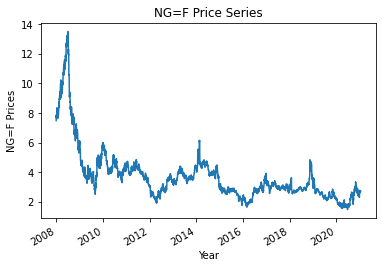

In [14]:
data.Close.plot()
plt.ylabel("{} Prices".format(stocks))
plt.xlabel("Year")
plt.title("{} Price Series".format(stocks))
plt.show()

<AxesSubplot:xlabel='Close', ylabel='Density'>

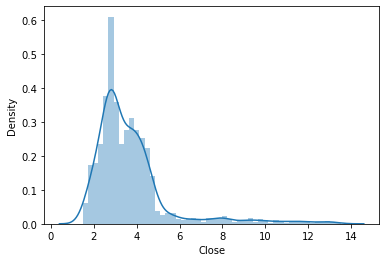

In [16]:
sns.distplot(data['Close'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

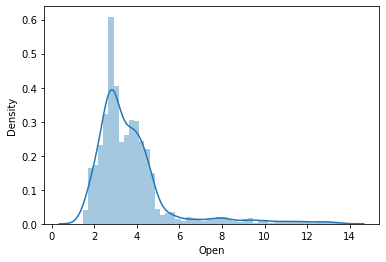

In [17]:
sns.distplot(data['Open'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

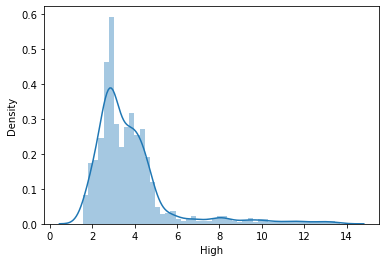

In [18]:
sns.distplot(data['High'])

In [20]:
#Inferences:
#-> Shape of the data
#-> Distribution of our data
#-> Non-Linear

In [21]:
X = data.drop("Close", axis = 1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2604, 4)
(652, 4)
(2604,)
(652,)


In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [23]:
pred1

array([ 2.90379654,  4.10693443,  2.82653372,  3.73693219,  3.93266347,
        3.79088622,  3.59035438,  1.72728096,  2.78063276,  4.53061106,
        2.1847237 ,  2.9458232 ,  4.43228442,  4.24585778,  3.31659025,
        4.83184829,  8.99854129,  3.73077567,  2.04211463,  2.81249668,
        3.09866515,  3.48109707,  2.77060226,  4.13375587,  2.93211063,
        3.91112244,  3.38011511,  4.62549892,  3.93561239,  3.61603312,
        2.8223151 ,  1.81620984,  2.7178312 , 11.49864709,  4.06371313,
        4.51740633,  2.68761357,  1.89132303,  2.96292218,  2.61028945,
        4.32567741,  2.97648968,  2.87597093,  3.12191485,  2.58927125,
        2.49327677,  2.5186038 ,  1.84619789,  4.653026  ,  2.61943693,
        2.91015977,  3.68345312,  2.32785375,  3.39158006,  2.95140413,
        3.69442777,  4.34712989,  2.98392268,  2.89075303, 12.78242168,
        5.72191527,  2.56798624,  4.93468344,  2.27837959, 13.21849088,
        4.18992567,  4.05428286,  7.74402844,  4.30800408,  2.36

In [26]:
#Mean Square Error
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print('R2 Score: ', r2)
    
calculate_metrics(y_test, pred1)

MSE:  0.001428657086617634
RMSE:  0.0377975804333774
R2 Score:  0.9995022528240004


In [27]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

In [28]:
calculate_metrics(y_test, la_p)

MSE:  0.2662900353572321
RMSE:  0.5160329789434316
R2 Score:  0.9072239837414766


In [29]:
calculate_metrics(y_test, ri_p)

MSE:  0.001545194059220114
RMSE:  0.03930895647584802
R2 Score:  0.9994616510941972


In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {"C" : [0.1, 1, 10, 100, 1000], 
         'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
         'kernel' : ['rbf']}
grid = GridSearchCV(svr, param_grid, refit = True, verbose = 3)

In [31]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.092, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.057, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.061, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.077, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.045, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.092, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.057, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.061, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.078, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.019, total=   1.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.023, total=   1.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.024, total=   1.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.009, total=   1.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.027, total=   1.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.237, total=   1.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.086, total=   1.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .... C=1000, gamma=0.001, kernel=rbf, score=-0.119, total=   1.3s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .... C=1000, gamma=0.001, kernel=rbf, score=-0.173, total=   1.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-1.018, total=   9.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-1.227, total=  12.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-1.332, total=   9.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-0.573, total=  10.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-0.985, total=  10.5s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.5min finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [32]:
svr = SVR(C = 10, gamma = 0.01, kernel = 'rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [34]:
import joblib
joblib.dump(ri, 'model.pkl')
rodge_from_joblib = model = joblib.load("model.pkl")